In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
X1 = np.random.randint(-10,30,100)
X2 = np.random.rand(100) + 5

true_betas = [2.5,4,7]

y = true_betas[0] + X1*true_betas[1] + X2 * true_betas[2]

#B
beta_hats = [1,0,-1]

In [12]:
#C
lr = LinearRegression().fit(X1.reshape(-1,1), y - beta_hats[2]*X2)
beta_hats[1] = lr.coef_
beta_hats[0] = lr.intercept_
print(f'The intercept is: {lr.intercept_} & the coefficient: {lr.coef_}')


The intercept is: 46.74304422129433 & the coefficient: [3.98131962]


$y$ = $Β_{0} + B_{1}*X1 + B_{2}*X2 $ then fixing x1

$y - B_{1}*X1$  = $Β_{0} + B_{2}*X2$

where:

$y - B_{1}*X1$ (y_train)

$Β_{0} + B_{2}*X2$ (X_train)



In [13]:
#D Fixing B2
lr = LinearRegression().fit(X2.reshape(-1, 1), y - beta_hats[1]*X1)
beta_hats[2] = lr.coef_
beta_hats[0] = lr.intercept_
print(f'The intercept is: {lr.intercept_} & the coefficient: {lr.coef_}')

The intercept is: 3.1012229632103825 & the coefficient: [6.93494172]


In [14]:
#E
beta_hat = [1,0,-1]
list_beta0 = [beta_hat[0]]
list_beta1 = [beta_hat[1]]
list_beta2 = [beta_hat[2]]

for itr in range(1000):
    lr1 = LinearRegression().fit(X1.reshape(-1,1),y - beta_hat[2]*X2)
    beta_hat[1] = lr1.coef_[0]
    list_beta1.append(beta_hat[1])

    lr2 = LinearRegression().fit(X2.reshape(-1,1),y - beta_hat[1]*X1)
    beta_hat[2] = lr2.coef_[0]
    beta_hat[0] = lr2.intercept_
    list_beta2.append(beta_hat[2])
    list_beta0.append(beta_hat[0])

    if itr%100 == 0:
        print('For iteration ',itr)
        print(beta_hat)

For iteration  0
[3.1012229632103825, 3.9813196198809573, 6.934941718711845]
For iteration  100
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  200
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  300
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  400
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  500
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  600
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  700
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  800
[2.500000000000064, 3.9999999999999987, 6.999999999999994]
For iteration  900
[2.500000000000064, 3.9999999999999987, 6.999999999999994]


(0.0, 10.0)

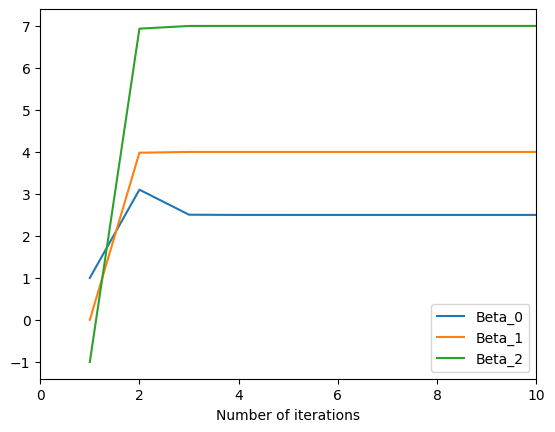

In [15]:
plt.plot(np.arange(1,1002),list_beta0,label = 'Beta_0')
plt.plot(np.arange(1,1002),list_beta1,label = 'Beta_1')
plt.plot(np.arange(1,1002),list_beta2,label = 'Beta_2')
plt.legend()
plt.xlabel('Number of iterations')
plt.xlim(0,10)

In [18]:
#F
lr = LinearRegression()
lr.fit(np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1), y)
betas_estimated = [lr.intercept_] + [lr.coef_[0]] + [lr.coef_[1]]
betas_estimated

[2.5000000000000284, 3.9999999999999996, 6.999999999999998]